# Style Transfer GAN Project

## Imports

In [1]:
import os
import tensorflow as tf
import tensorflow_hub as hub
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False
from tensorflow.keras.utils import plot_model
import numpy as np
import PIL.Image
import time
import functools

## Prepearing the Data

In [2]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [3]:
IMG_SIZE=256
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [4]:
content_path ="/content/drive/MyDrive/GAN-Projekt/portrait.jpg"
style_path ="/content/drive/MyDrive/GAN-Projekt/AI_Image.jpg"

In [21]:
style=process_image(style_path)
portrait=process_image(content_path)

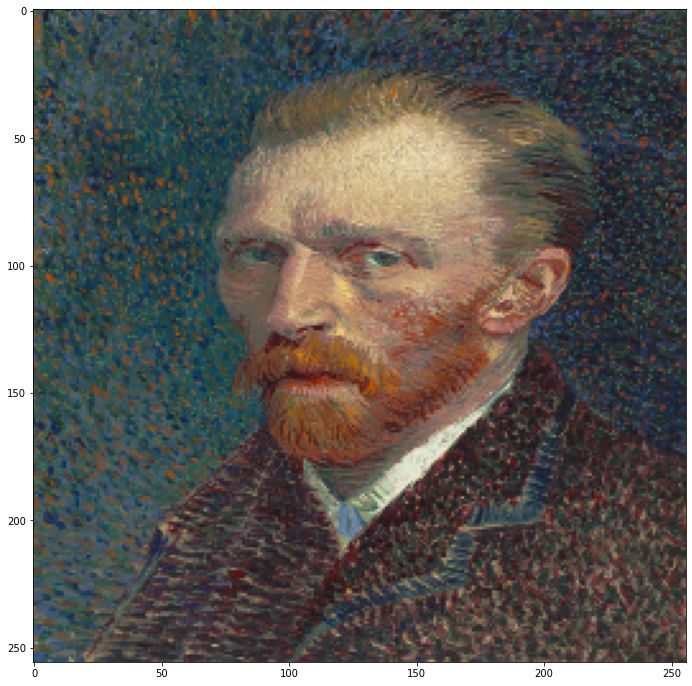

In [22]:
plt.imshow(portrait)

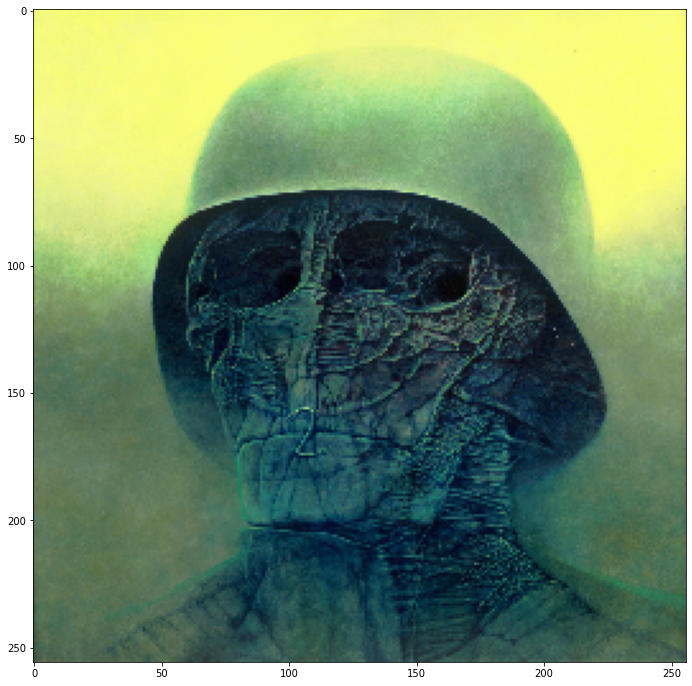

In [23]:
plt.imshow(style)

## Transfer Learning

In [24]:
content_image = plt.imread(content_path)
style_image = plt.imread(style_path)
content_image = content_image.astype(np.float32)[np.newaxis, ...] / 255.
style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.
style_image = tf.image.resize(style_image, (256, 256))
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]

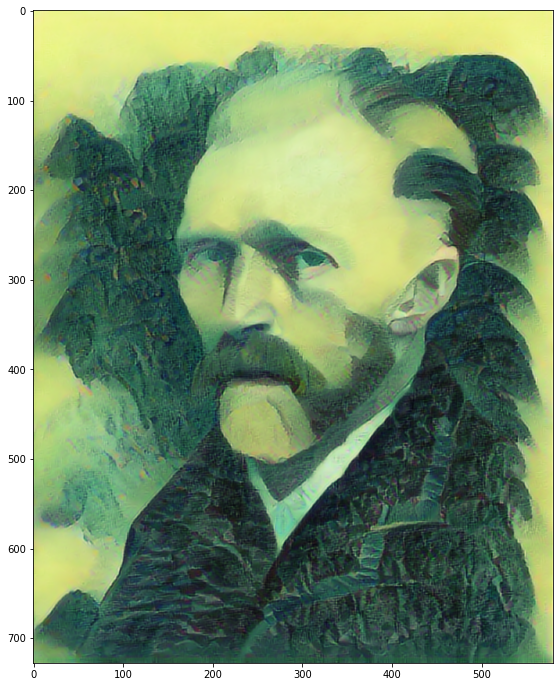

In [27]:
plt.imshow(tf.reshape(stylized_image,(728,580,3)));

## Trying the Reverse Style Transfer

In [28]:
content_image = plt.imread(style_path)
style_image = plt.imread(content_path)
content_image = content_image.astype(np.float32)[np.newaxis, ...] / 255.
style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.
style_image = tf.image.resize(style_image, (256, 256))
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]

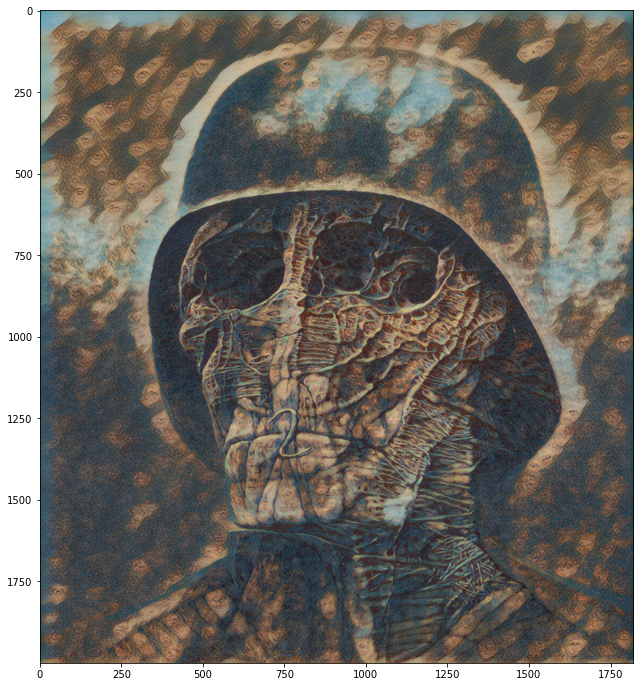

In [31]:
plt.imshow(tf.reshape(stylized_image,(2000,1820,3)));